<a href="https://colab.research.google.com/github/ash7-g/ML/blob/main/1BM23CS400_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated Dataset:
        Height     Weight  Blood_Pressure
0   174.967142  61.565687      220.719054
1   168.617357  54.807533      236.677487
2   176.476885  74.713710      237.874438
3   185.230299  56.379639      217.141751
4   167.658466  48.815444      221.107038
5   167.658630  91.984732      235.208664
6   185.792128  66.613355      238.275384
7   177.674347  71.012923      216.050811
8   165.305256  48.628777      198.273789
9   175.425600  61.834259      229.148820
10  165.365823  71.663839      237.398648
11  165.342702  52.735096      216.573111
12  172.419623  75.635470      235.561705
13  150.867198  60.990420      211.214898
14  152.750822  65.624594      204.089866


--- Linear Regression Model Performance ---
Mean Squared Error: 12.28
R-squared: 0.55


--- Random Forest Regressor Model Performance ---
Mean Squared Error: 25.29
R-squared: 0.08


--- Gradient Boosting Regressor Model Performance ---
Mean Squared Error: 200.54
R-squared: -6.32


--- Model Comparison ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


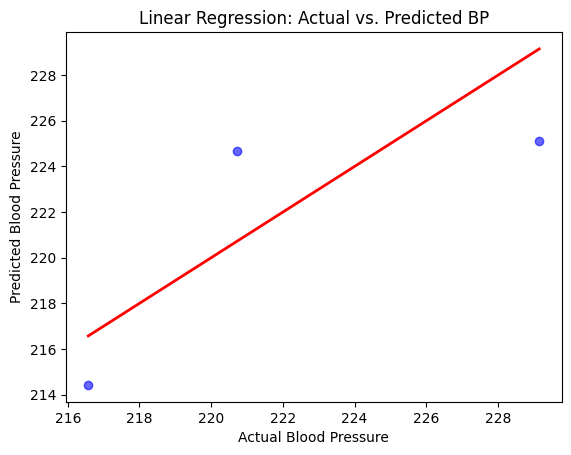

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a sample dataset with 15 values for Height, Weight, and Blood Pressure
np.random.seed(42)
heights = np.random.normal(170, 10, 15)
weights = np.random.normal(70, 15, 15)
# Simple linear relationship with some noise for BP
blood_pressure = 0.5 * heights + 0.8 * weights + np.random.normal(90, 10, 15)

data = pd.DataFrame({
    'Height': heights,
    'Weight': weights,
    'Blood_Pressure': blood_pressure
})

print("Generated Dataset:")
print(data)
print("\n")

# Define features (X) and target variable (y)
X = data[['Height', 'Weight']]
y = data['Blood_Pressure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the ML Model (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the Linear Regression Model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("--- Linear Regression Model Performance ---")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")
print("\n")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("--- Random Forest Regressor Model Performance ---")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")
print("\n")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("--- Gradient Boosting Regressor Model Performance ---")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")
print("\n")

# Comparison Summary
print("--- Model Comparison ---")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}")
print(f"Random Forest Regressor - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")
print(f"Gradient Boosting Regressor - MSE: {gb_mse:.2f}, R2: {gb_r2:.2f}")

example_height = 175
example_weight = 75
predicted_bp = lr_model.predict([[example_height, example_weight]])
print(f"\nPredicted Blood Pressure for Height {example_height} and Weight {example_weight}: {predicted_bp[0]:.2f}")

tolerance = 5

def calculate_pseudo_accuracy(actual, predictions, tolerance):
    correct_predictions = np.sum(np.abs(actual - predictions) <= tolerance)
    return correct_predictions / len(actual)

print(f"Tolerance: +/- {tolerance}")

lr_pseudo_accuracy = calculate_pseudo_accuracy(y_test, lr_predictions, tolerance)
rf_pseudo_accuracy = calculate_pseudo_accuracy(y_test, rf_predictions, tolerance)
gb_pseudo_accuracy = calculate_pseudo_accuracy(y_test, gb_predictions, tolerance)

print(f"Linear Regression-Accuracy: {lr_pseudo_accuracy:.2f}")
print(f"Random Forest Regressor-Accuracy: {rf_pseudo_accuracy:.2f}")
print(f"Gradient Boosting Regressor-Accuracy: {gb_pseudo_accuracy:.2f}")


plt.scatter(y_test, lr_predictions, color="blue", alpha=0.6)
plt.xlabel("Actual Blood Pressure")
plt.ylabel("Predicted Blood Pressure")
plt.title("Linear Regression: Actual vs. Predicted BP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.show()
